<a href="https://www.kaggle.com/code/grandwizard/penguins-clustering-k-means-dbscan-agglom?scriptVersionId=205639501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering-penguins-species/penguins.csv


In [2]:
data = pd.read_csv("/kaggle/input/clustering-penguins-species/penguins.csv")
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [4]:
data['sex'].fillna(data['sex'].mode().iloc[0], inplace=True)
data.sex = data.sex.apply(lambda x: 1 if x == 'MALE' else 0 if x == 'FEMALE' else None)

/tmp/ipykernel_17/1595294640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].fillna(data['sex'].mode().iloc[0], inplace=True)


In [5]:
data.dropna(inplace=True)

In [6]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,341.000000,341.000000,341.000000,341.000000,341.000000
mean,43.920235,17.155425,214.005865,4199.780059,0.516129
std,5.467516,1.976124,260.940899,802.300201,0.500474
min,32.100000,13.100000,-132.000000,2700.000000,0.000000
25%,39.200000,15.600000,190.000000,3550.000000,0.000000
50%,44.400000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000


In [7]:
data = data[(data.flipper_length_mm > 0) & (data.flipper_length_mm < 1000)]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = StandardScaler().fit_transform(data)

pca = PCA(n_components=3)
data = pd.DataFrame(pca.fit_transform(data), columns=['x', 'y', 'z'])

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

models = []
score1 = []
score2 = []
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data,model.labels_))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

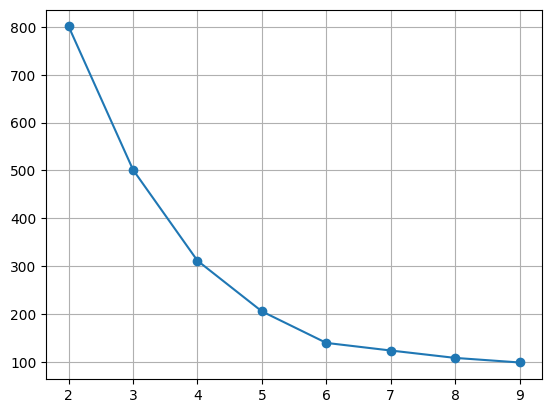

In [10]:
plt.grid()
plt.plot(np.arange(2,10), score1, marker = 'o')
plt.show()

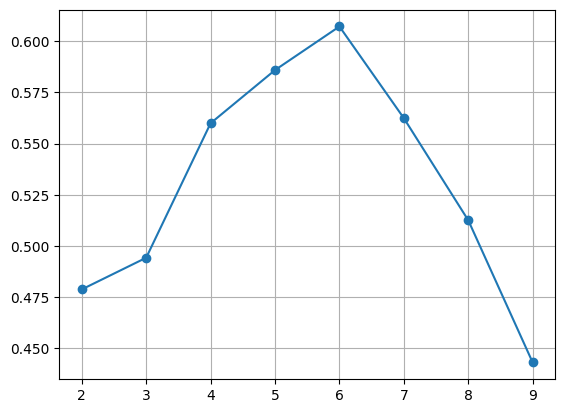

In [11]:
plt.grid()
plt.plot(np.arange(2,10), score2, marker = 'o')
plt.show()

In [12]:
model1 = KMeans(n_clusters=6, random_state=123, init='k-means++')

model1.fit(data)
model1.cluster_centers_

labels = model1.labels_

data['Cluster'] = labels
data['Cluster'].value_counts()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
1    78
3    73
0    64
2    58
4    37
5    29
Name: count, dtype: int64

In [13]:
fig = go. Figure(data=[go.Scatter3d(x=data['x'],y=data['y'],z=data['z'],
mode='markers', marker_color=data['Cluster'], marker_size = 4)])

fig.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

mode12 = AgglomerativeClustering(6, compute_distances=True)
clastering = mode12.fit(data)
data['Cluster'] = clastering.labels_

fig = go.Figure(data=[go.Scatter3d(x=data['x'],y=data['y'],z=data['z'],
mode='markers', marker_color=data['Cluster'], marker_size = 4)])

fig.show()

In [15]:
from sklearn.cluster import DBSCAN

model3 = DBSCAN(eps=0.5, min_samples=5).fit(data)

data['Cluster'] = model3.labels_

fig = go.Figure(data=[go.Scatter3d(x=data['x'],y=data['y'],z=data['z'],
mode='markers', marker_color=data['Cluster'], marker_size = 4)])

fig.show()